## MNIST

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

import mnist
import scipy.misc
import pickle
import gzip
import numpy as np
from random import randint
import os
from PIL import Image

images = mnist.train_images()

In [29]:
a = np.array(images[10]).reshape((28, 28))
print(a)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

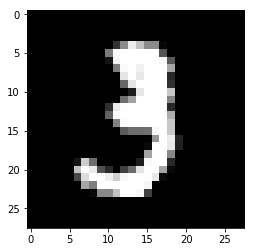

In [30]:
plt.imshow(a, cmap = 'Greys_r')

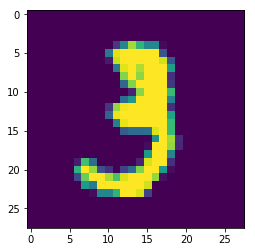

In [31]:
plt.imshow(a)

In [42]:
print(a[:, 5:22])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0]
 [  0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0]
 [  0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0]
 [  0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0]
 [  0   0   0   0   0   0   0 207 254 210 254 254 254  34   0   0   0]
 [  0   0   0   0   0   0   0  84 206 254 254 254 254  41   0   0   0]
 [  0   0   0   0   0   0   0   0  24 209 254 254 254 171   0   0   0]
 [  0   0   0   0   0   0   0  91 137 253 254 254 254 112   0   0   0]
 [  0   0   0   0   0  40 214 250 254 254 254 254 254  34   0   0   0]
 [  0   0   0   0   0  81 247 254 254 254 254 254 254 146   0   0   0]
 [  0 

## Load MNIST data

In [19]:
filename = 'C:/afranklin/UB/CSE574_Fall18/proj3/mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [20]:
print("--------------------------------------------")
print("Training data dimension     : " + str(training_data[0].shape))
print("Training target dimension   : " + str(training_data[1].shape))
print("--------------------------------------------")
print("Validatoin data dimension   : " + str(validation_data[0].shape))
print("Validation target dimension : " + str(validation_data[1].shape))
print("--------------------------------------------")
print("Testing data dimension      : " + str(test_data[0].shape))
print("Testing target dimension    : " + str(test_data[1].shape))
print("--------------------------------------------")
print("Each dataraw has: " + str(training_data[0][0].shape) + "rows")

--------------------------------------------
Training data dimension     : (50000, 784)
Training target dimension   : (50000,)
--------------------------------------------
Validatoin data dimension   : (10000, 784)
Validation target dimension : (10000,)
--------------------------------------------
Testing data dimension      : (10000, 784)
Testing target dimension    : (10000,)
--------------------------------------------
Each dataraw has: (784,)rows


## Load USPS

In [21]:
USPSMat  = []
USPSTar  = []
curPath  = 'C:/afranklin/UB/CSE574_Fall18/proj3/USPS/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

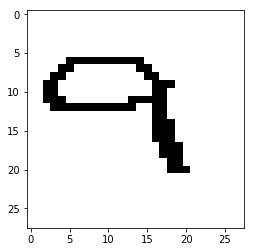

In [162]:
%matplotlib inline
from matplotlib.pyplot import imshow
imshow(img)

In [163]:
def ArrMulti(u,x):
    return np.array(np.transpose(np.asmatrix(u)) * np.asmatrix(x))

## Variable Intialization

In [164]:
wt       = np.random.rand(10,784)/10000
bias     = 1
trainMat = training_data[0]
trainTar = training_data[1]
valMat   = validation_data[0]
valTar   = validation_data[1]
t        = np.zeros(shape=(50000,10))

## Create One Hot Vector Target

In [165]:
for i in range(len(trainMat)):
    t[i][trainTar[i]] = 1